# Visualize CBH Schemes

In [1]:
# import relevant rdkit 
from rdkit import Chem
from rdkit.Chem import Draw, rdChemReactions, PandasTools
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
from IPython.display import SVG, display

# Import CBH generator
from autoCBH import buildCBH
import pandas as pd

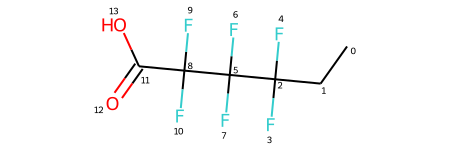

In [2]:
# Input to the CBH generator is a SMILES string.
# Visualize the molecule you will use. 
# Use the following link for getting help with this:
#     http://www.cheminfo.org/flavor/malaria/Utilities/SMILES_generator___checker/index.html

# If working with organometallics, please choose an atom that resembles the bonding pattern
# ie. plantinum atom representing adsorption will not work with SMILES, but if you substitute with a halogen
#    it will work

########### CHANGE THIS ############
mol = 'CCC(F)(F)C(F)(F)C(F)(F)C(=O)O'
####################################
m = Chem.MolFromSmiles(mol)
m

In [3]:
# Instantiate and build the CBH scheme
# This will automatically build a CBH scheme until the rung before 
cbh = buildCBH(mol)

In [4]:
# View the reactants for each CBH rung
cbh.cbh_rcts

{0: {'[H][H]': 14.0},
 1: {'C': 12},
 2: {'CC': 4},
 3: {'CC(C)(F)F': 3},
 4: {'CC(F)(F)C(C)(F)F': 2},
 5: {'CC(=O)O': 2, 'CCC': 1, 'CC(F)(F)C(F)(F)C(C)(F)F': 1, 'CC(C)(F)F': 6}}

In [5]:
# View the products for each CBH rung
cbh.cbh_pdts

{0: {'F': 6, 'O': 2, 'C': 6},
 1: {'CO': 1, 'CC': 5, 'CF': 6, 'C=O': 1},
 2: {'CC(=O)O': 1, 'CCC': 1, 'CC(C)(F)F': 3},
 3: {'CCC(C)(F)F': 1, 'CC(F)(F)C(C)(F)F': 2, 'CC(F)(F)C(=O)O': 1},
 4: {'CCC(F)(F)C(C)(F)F': 1,
  'CC(F)(F)C(F)(F)C(=O)O': 1,
  'CC(=O)O': 2,
  'CCC': 1,
  'CC(F)(F)C(F)(F)C(C)(F)F': 1,
  'CC(C)(F)F': 6},
 5: {'CCC(C)(F)F': 1,
  'CC(F)(F)C(=O)O': 1,
  'CC(F)(F)C(F)(F)C(F)(F)C(=O)O': 1,
  'CCC(F)(F)C(F)(F)C(C)(F)F': 1}}

CBH LEVEL 0

Reactants:


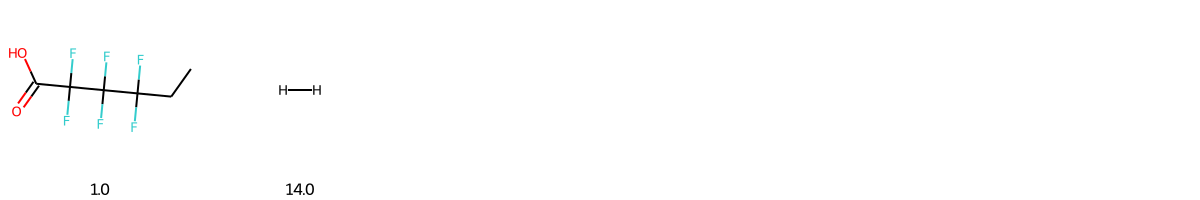


Products:


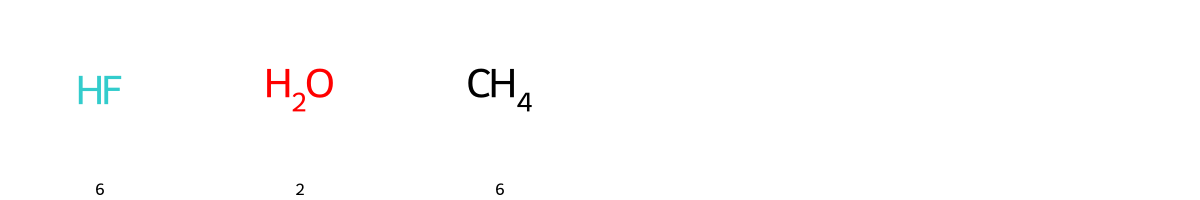


-----------------------------------------------------------------------------------------------------

CBH LEVEL 1

Reactants:


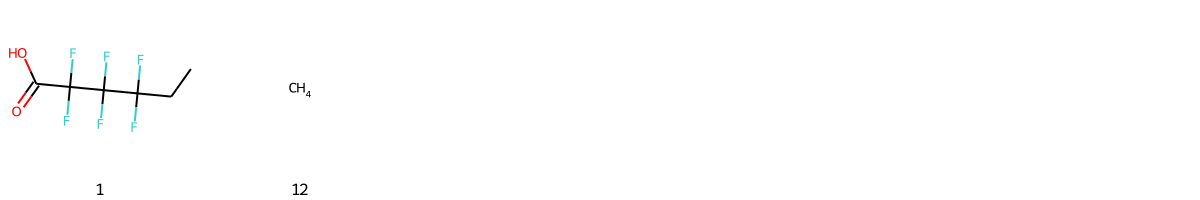


Products:


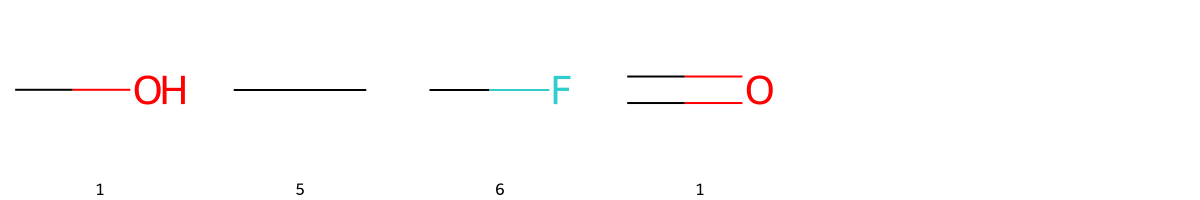


-----------------------------------------------------------------------------------------------------

CBH LEVEL 2

Reactants:


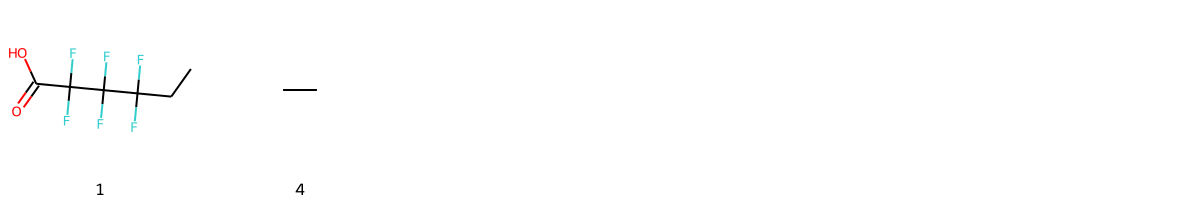


Products:


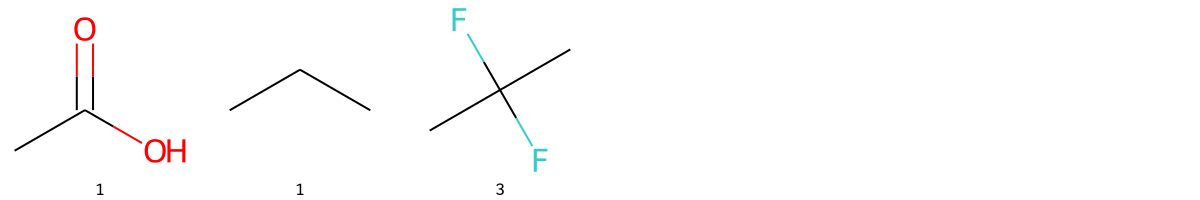


-----------------------------------------------------------------------------------------------------

CBH LEVEL 3

Reactants:


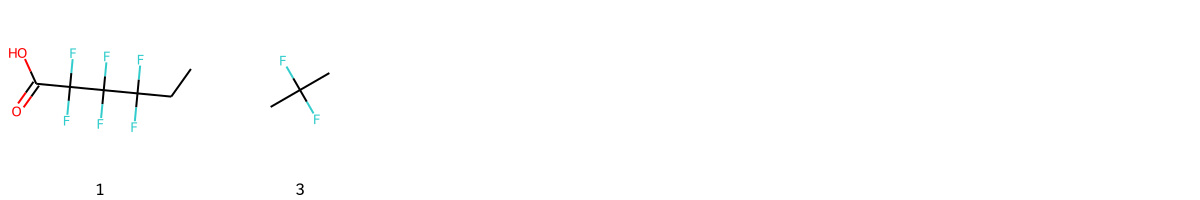


Products:


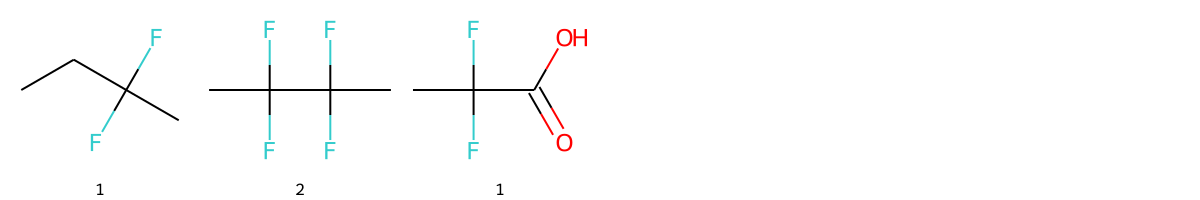


-----------------------------------------------------------------------------------------------------

CBH LEVEL 4

Reactants:


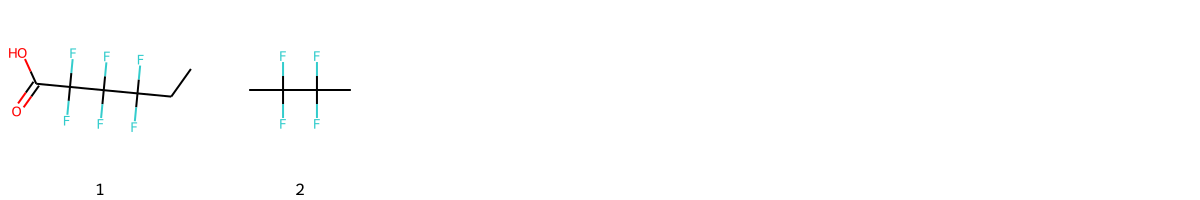


Products:


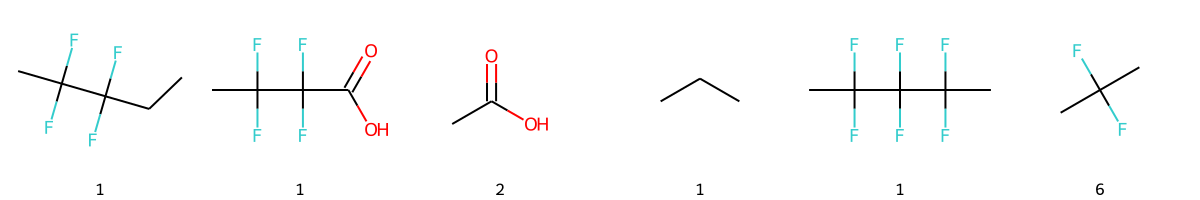


-----------------------------------------------------------------------------------------------------

CBH LEVEL 5

Reactants:


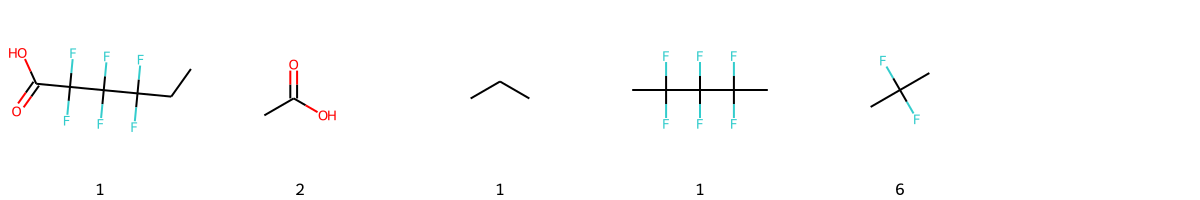


Products:


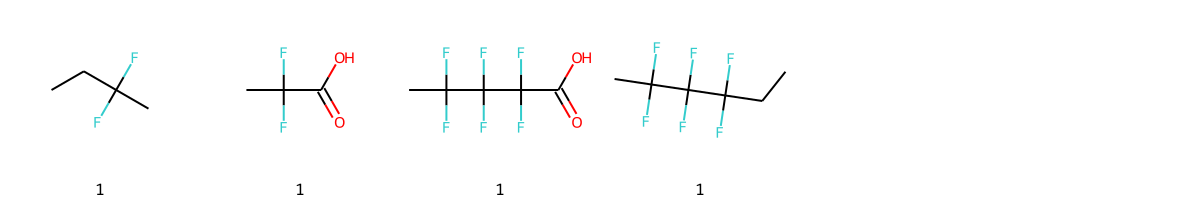


-----------------------------------------------------------------------------------------------------



In [10]:
# Visualize the reactions for each cbh_level.
# This is being worked on so that it shows the stoichiometry better.

# For now, the order of the displayed molecules matches the order in shown in the dictionary above.

max_num_mols = max([len(v) for v in cbh.cbh_pdts.values()]+[len(v) for v in cbh.cbh_rcts.values()])

# cycle through each CBH rung
for cbh_level in cbh.cbh_pdts.keys():
    # Format SMARTS string
    rct = ''
    pdt = ''
    for key in cbh.cbh_pdts[cbh_level]:
        pdt = pdt + '.' + key
    pdt = pdt[1:]
    for key in cbh.cbh_rcts[cbh_level]:
        rct = rct + '.' + key
    rct = rct[1:]
    rxn = cbh.smile+'.'+rct+'>>'+pdt
    
    # Visualize reaction without atom indices
    IPythonConsole.drawOptions.addAtomIndices = False
    # Create pandas df of reactant and products
    rct_df = pd.DataFrame(cbh.cbh_rcts[cbh_level].items(), columns=['smiles', 'num'])
    target = pd.DataFrame({mol:1}.items(), columns=['smiles', 'num'])
    rct_df = pd.concat([target, rct_df[:]]).reset_index(drop = True)
    PandasTools.AddMoleculeColumnToFrame(rct_df, smilesCol='smiles')
    pdt_df = pd.DataFrame(cbh.cbh_pdts[cbh_level].items(), columns=['smiles', 'num'])
    PandasTools.AddMoleculeColumnToFrame(pdt_df, smilesCol='smiles')
    
    print(f'CBH LEVEL {cbh_level}')
    print(f'\nReactants:')
    display(PandasTools.FrameToGridImage(rct_df, legendsCol="num", molsPerRow=max_num_mols))
    print(f'\nProducts:')
    display(PandasTools.FrameToGridImage(pdt_df, legendsCol="num", molsPerRow=max_num_mols))
    print('\n-----------------------------------------------------------------------------------------------------\n')

CBH LEVEL 0
	CBH Reactants (Target Molecule Omitted): 
		- [14.0]

							CBH Products: 
								- [6, 2, 6]


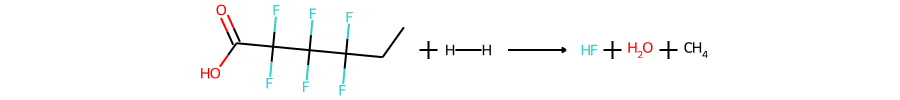

-------------------------------------------------------------------------------------------------------

CBH LEVEL 1
	CBH Reactants (Target Molecule Omitted): 
		- [12]

							CBH Products: 
								- [1, 5, 6, 1]


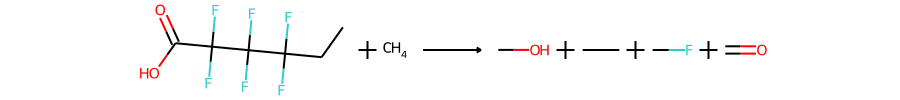

-------------------------------------------------------------------------------------------------------

CBH LEVEL 2
	CBH Reactants (Target Molecule Omitted): 
		- [4]

							CBH Products: 
								- [1, 1, 3]


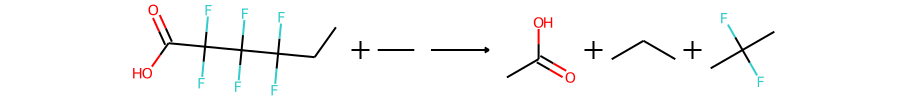

-------------------------------------------------------------------------------------------------------

CBH LEVEL 3
	CBH Reactants (Target Molecule Omitted): 
		- [3]

							CBH Products: 
								- [1, 2, 1]


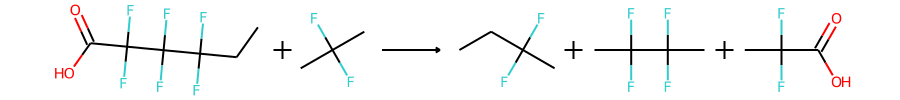

-------------------------------------------------------------------------------------------------------

CBH LEVEL 4
	CBH Reactants (Target Molecule Omitted): 
		- [2]

							CBH Products: 
								- [1, 1, 2, 1, 1, 6]


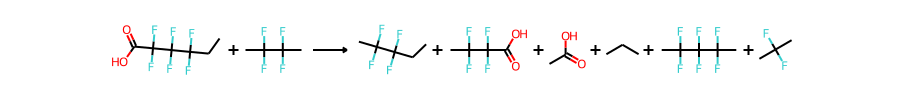

-------------------------------------------------------------------------------------------------------

CBH LEVEL 5
	CBH Reactants (Target Molecule Omitted): 
		- [2, 1, 1, 6]

							CBH Products: 
								- [1, 1, 1, 1]


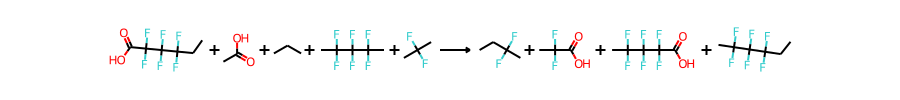

-------------------------------------------------------------------------------------------------------



In [9]:
# Alternative way to visualize the reactions for each cbh_level.
# This is being worked on so that it shows the stoichiometry better.

# For now, the order of the displayed molecules matches the order in shown in the dictionary above.

# cycle through each CBH rung
for cbh_level in cbh.cbh_pdts.keys():
    # Format SMARTS string
    rct = ''
    pdt = ''
    for key in cbh.cbh_pdts[cbh_level]:
        pdt = pdt + '.' + key
    pdt = pdt[1:]
    for key in cbh.cbh_rcts[cbh_level]:
        rct = rct + '.' + key
    rct = rct[1:]
    rxn = cbh.smile+'.'+rct+'>>'+pdt
    
    # Visualize reaction without atom indices
    IPythonConsole.drawOptions.addAtomIndices = False
    rxn = rdChemReactions.ReactionFromSmarts(rxn, useSmiles=True)
    d = Draw.MolDraw2DSVG(900, 100)
    d.DrawReaction(rxn)
    d.FinishDrawing()
    svg = d.GetDrawingText()
    svg2 = svg.replace('svg:','')
    svg3 = SVG(svg2)
    print(f'CBH LEVEL {cbh_level}')
    print(f'\tCBH Reactants (Target Molecule Omitted): \n\t\t- {[v for v in cbh.cbh_rcts[cbh_level].values()]}')
    print(f'\n\t\t\t\t\t\t\tCBH Products: \n\t\t\t\t\t\t\t\t- {[v for v in cbh.cbh_pdts[cbh_level].values()]}')
    display(svg3)
    print('-------------------------------------------------------------------------------------------------------\n')